# Q-Learning

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.optimize import fsolve, minimize
from scipy.integrate import quad
from scipy import linspace, meshgrid, arange, empty, concatenate, newaxis, shape
from collections import deque
import nbimporter

In [11]:
from important_functions import *
from MDP_core_allocation import *

In [23]:
# Model parameters
lam = 2
mu = 1
cores = 10
p1 = 0.4
p2 = 0.9
alpha = 0.4
M = 20

pars = [lam, mu, cores, p1, p2, alpha, M]

## Suppose we discretize our actions, then $|S| \times |A|$ is finite. Then, we can use regular Q-learning (i.e. without function approximation)
## $Q^{\pi}(s, a) = \mathbb{E}_{\pi}\left[\sum_{t=0}^{\infty} \left(c_t - \rho^{\pi}\right) \vert S_0 = s, A_0 = a \right]$
## $\rho^{\pi} = \lim_{T \rightarrow \infty} \frac{1}{T} \sum_{t=0}^{T-1} \mathbb{E}_{\pi}[c_t]$
## Update rules:
## $Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha_t \left( c_t - \rho_t + \min_{a'} Q(s_{t+1}, a') - Q(s_t, a_t) \right)$, where $\alpha_t$ is the learning rate
## $\rho_{t+1} = \rho_t + \beta_t \left(c_t - \rho_t \right)$, where $\beta_t$ is another step size parameter often set smaller than $\alpha_t$

## Q-Learning optimal policy

In [24]:
QL_Q_values, QL_pi_optimal, QL_long_run_average_cost_history, QL_count_state_action_visits = QL_optimal_policy(pars)

# print("Optimal actions learnt from Q-learning are ")
# print(QL_pi_optimal)

# print("Q-values are")
# print(np.matrix.round(QL_Q_values,2))

In [25]:
# Check optimal actions after every 1000 iterations
# Plot Q-values for Q-learning approach after every 1000 iterations.

## Bellman optimal policy

In [26]:
bellman_pi_optimal, bellman_relative_V_optimal, bellman_relative_Q_optimal = bellman_optimal_policy(pars)

# Testing
print("Optimal actions from solving bellman equation are ")
print("")
print(np.matrix.round(bellman_pi_optimal,3))

Optimal actions from solving bellman equation are 

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [1.  0.4 0.3 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [1.  0.5 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [1.  0.6 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [1.  0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [1.  0.7 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [1.  0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [1.  0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [1.  1.  1.  1.  1.  0.5 0.4 0.3 0.2 1.  1. ]]


## Difference in Q-learning and Bellman optimal policies

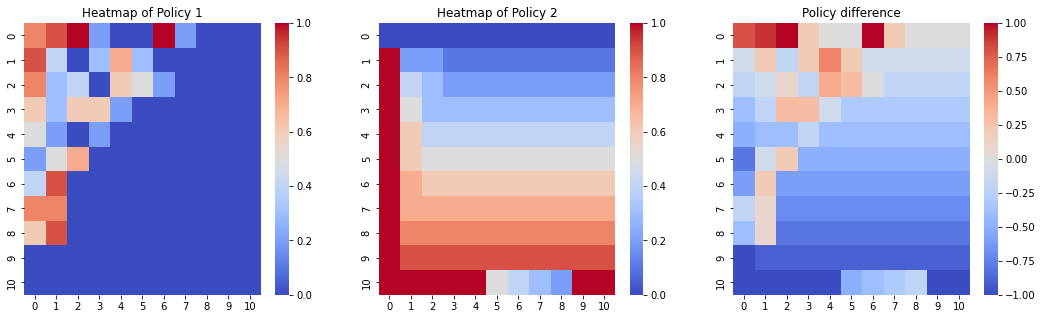

In [27]:
visualize_policies(QL_pi_optimal, bellman_pi_optimal)

## Visualizing simulation variables

Text(0.5, 1.0, 'Long run average cost iterates')

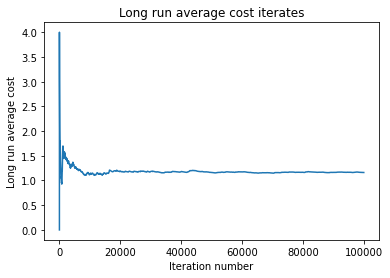

In [28]:
# Long run average cost

plt.plot(QL_long_run_average_cost_history)
plt.xlabel("Iteration number")
plt.ylabel("Long run average cost")
plt.title("Long run average cost iterates")

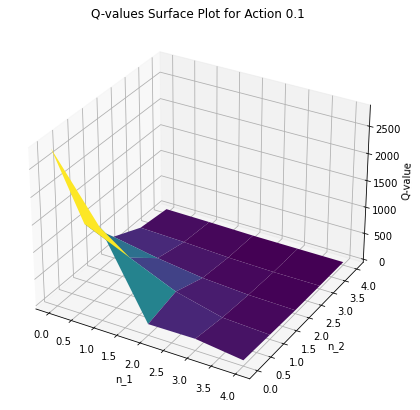

In [29]:
# Number of state-action visits
plot_q_surface(QL_count_state_action_visits[0:5, 0:5], cores, action = 0.1)